<a href="https://colab.research.google.com/github/mitali-g/MachineLearning/blob/master/SqeezeNet_Chest_Xray_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Input, GlobalAveragePooling2D, BatchNormalization, concatenate
from keras.utils import np_utils
import os, cv2, random
import pandas as pd
%matplotlib inline

In [ ]:
!ls Resized_Dataset/train-resized|wc

   5309    5309  137840


In [ ]:
!ls -ltr
!date

total 1494060
-rw-r--r-- 1 root root     314074 Mar 20 01:27 Chest_xray_Corona_Metadata.csv
-rw-r--r-- 1 root root        252 Mar 20 01:27 Chest_xray_Corona_dataset_Summary.csv
drwxr-xr-x 1 root root       4096 Jun 26 16:26 sample_data
drwx------ 4 root root       4096 Jul  7 16:58 drive
-rw-r--r-- 1 root root       2671 Jul  7 16:58 adc.json
-rw-r--r-- 1 root root         64 Jul  7 17:00 kaggle.json
-rw-r--r-- 1 root root 1275680348 Jul  7 17:00 CoronaHack-Chest-XRaydataset.zip
drwxr-xr-x 4 root root       4096 Jul  7 17:27 Coronahack-Chest-XRay-Dataset
-rw-r--r-- 1 root root  253890139 Jul  7 21:05 Resized_Dataset.zip
Tue Jul  7 21:11:46 UTC 2020


In [2]:
!unzip -q Resized_Dataset.zip

In [3]:
dataset = pd.read_csv("Resized_Dataset/Chest_xray_Corona_Metadata.csv")
print(dataset.shape)
dataset.head(5932)

(5910, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


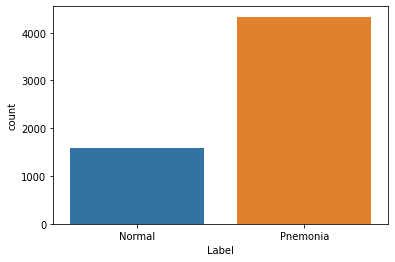

In [4]:
import seaborn as sns
sns.countplot(dataset['Label'])

In [5]:
dataset['X_ray_image_name']

0                IM-0128-0001.jpeg
1                IM-0127-0001.jpeg
2                IM-0125-0001.jpeg
3                IM-0122-0001.jpeg
4                IM-0119-0001.jpeg
                   ...            
5905    person1637_virus_2834.jpeg
5906    person1635_virus_2831.jpeg
5907    person1634_virus_2830.jpeg
5908    person1633_virus_2829.jpeg
5909    person1632_virus_2827.jpeg
Name: X_ray_image_name, Length: 5910, dtype: object

In [6]:
dataset[['X_ray_image_name', 'Label']]

,X_ray_image_name,Label
0,IM-0128-0001.jpeg,Normal
1,IM-0127-0001.jpeg,Normal
2,IM-0125-0001.jpeg,Normal
3,IM-0122-0001.jpeg,Normal
4,IM-0119-0001.jpeg,Normal
...,...,...
5905,person1637_virus_2834.jpeg,Pnemonia
5906,person1635_virus_2831.jpeg,Pnemonia
5907,person1634_virus_2830.jpeg,Pnemonia
5908,person1633_virus_2829.jpeg,Pnemonia


In [7]:
x_trainFeatures = dataset[['X_ray_image_name']]
x_trainFeatures = x_trainFeatures[0:5309]
print(x_trainFeatures)

               X_ray_image_name
0             IM-0128-0001.jpeg
1             IM-0127-0001.jpeg
2             IM-0125-0001.jpeg
3             IM-0122-0001.jpeg
4             IM-0119-0001.jpeg
...                         ...
5304  NORMAL2-IM-0066-0001.jpeg
5305  NORMAL2-IM-0060-0001.jpeg
5306  NORMAL2-IM-0059-0001.jpeg
5307  NORMAL2-IM-0058-0001.jpeg
5308  NORMAL2-IM-0052-0001.jpeg

[5309 rows x 1 columns]


In [8]:
y_train_labels = dataset[['Label']]
y_train_labels = y_train_labels[0:5309]
#print(y_train_labels)

y_train = []
for label in y_train_labels['Label']:
  if label == 'Pnemonia':
    y_train.append(1)
  elif label == 'Normal':
    y_train.append(0)
  else:
    print(label)
#print(y_train)
y_train = keras.utils.to_categorical(y_train)
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:
x_testFeatures = dataset[['X_ray_image_name']]
x_testFeatures = x_testFeatures[5309:]
print(x_testFeatures)

                X_ray_image_name
5309   NORMAL2-IM-0051-0001.jpeg
5310   NORMAL2-IM-0045-0001.jpeg
5311   NORMAL2-IM-0041-0001.jpeg
5312   NORMAL2-IM-0035-0001.jpeg
5313   NORMAL2-IM-0033-0001.jpeg
...                          ...
5905  person1637_virus_2834.jpeg
5906  person1635_virus_2831.jpeg
5907  person1634_virus_2830.jpeg
5908  person1633_virus_2829.jpeg
5909  person1632_virus_2827.jpeg

[601 rows x 1 columns]


In [10]:
y_test_labels = dataset[['Label']]
y_test_labels = y_test_labels[5309:]
#print(y_test_labels)

y_test = []
for label in y_test_labels['Label']:
  if label == 'Pnemonia':
    y_test.append(1)
  elif label == 'Normal':
    y_test.append(0)
  else:
    print(label)
#print(y_test)
y_test = keras.utils.to_categorical(y_test)
print(y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [13]:
import os
list_of_images = os.listdir('Resized_Dataset/train-resized')
len(list_of_images)

5309

5309

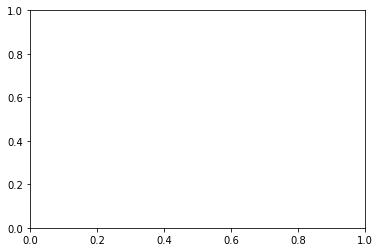

In [14]:
x_train = []

list_of_images = os.listdir('Resized_Dataset/train-resized')
for image in list_of_images:
  image = plt.imread('Resized_Dataset/train-resized/' + image)
  plt.grid(False)
  x_train.append(image)
len(x_train)

601

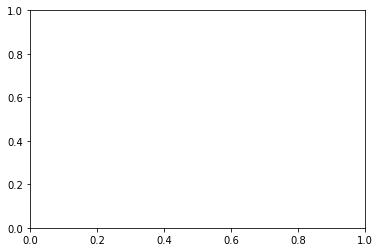

In [15]:
x_test = []
#for image in os.listdir('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test-resized'):
 # image = plt.imread('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test-resized/' + image)
 # plt.grid(False)
 # x_test.append(image)
#len(x_test)

test_path = ('Resized_Dataset/test-resized/')

for image in x_testFeatures['X_ray_image_name']:
  # image.rfind : removes '.jpeg'
  image_path =test_path + image[:image.rfind('.jpeg')]


  if os.path.isfile(image_path + '.png'):
    image = plt.imread(image_path + '.png')
    plt.grid(False)
    x_test.append(image)
len(x_test)

In [16]:
x_train = np.array(x_train, np.float16) / 255.0
y_train = np.array(y_train)
print(len(x_train), len(y_train), x_train.shape, y_train.shape)

x_test = np.array(x_test, np.float16) / 255.0
y_test = np.array(y_test)
print(len(x_test), len(y_test), x_test.shape, y_test.shape)

5309 5309 (5309, 256, 256, 4) (5309, 2)
601 601 (601, 256, 256, 4) (601, 2)


In [ ]:
#plt.imshow(x_train[100])

#x_train[0].shape

#gray_image = plt.imshow(x_train[0], cmap = 'gray')
#len(x_train[0].shape)

In [29]:
print(y_train.shape)
print(y_test.shape)

(5309, 2)
(601, 2)


In [53]:
# https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/07_Keras_Flowers_TPU_squeezenet.ipynb
bnmomentum=0.9
def fire(x, squeeze, expand):
  y = Conv2D(filters=squeeze, kernel_size=1, padding='same', activation='relu')(x)
  y = BatchNormalization(momentum=bnmomentum)(y)
  y1 = Conv2D(filters=expand//2, kernel_size=1, padding='same', activation='relu')(y)
  y1 = BatchNormalization(momentum=bnmomentum)(y1)
  y3 = Conv2D(filters=expand//2, kernel_size=3, padding='same', activation='relu')(y)
  y3 = BatchNormalization(momentum=bnmomentum)(y3)
  return concatenate([y1, y3])

def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)
x = Input(shape=[256, 256, 4])
# y = fire_module(squeeze=24, expand=48)(x) # squeeze is less than expand
# y = fire_module(squeeze=32, expand=64)(y)


y = Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(x)
y = BatchNormalization(momentum=bnmomentum)(y)
y = fire_module(24, 48)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 96)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 128)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 96)(y)
y = MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 48)(y)
y = GlobalAveragePooling2D()(y)
y = Dense(2, activation='softmax')(y)
model = tf.keras.Model(x, y)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d_358 (Conv2D)             (None, 256, 256, 32) 1184        input_24[0][0]                   
__________________________________________________________________________________________________
batch_normalization_97 (BatchNo (None, 256, 256, 32) 128         conv2d_358[0][0]                 
__________________________________________________________________________________________________
conv2d_359 (Conv2D)             (None, 256, 256, 24) 792         batch_normalization_97[0][0]     
____________________________________________________________________________________________

In [54]:
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
150/150 [==============================] - 1581s 11s/step - loss: 0.6215 - accuracy: 0.6909 - val_loss: 0.3840 - val_accuracy: 0.9548
Epoch 2/10
150/150 [==============================] - 1579s 11s/step - loss: 0.5978 - accuracy: 0.7189 - val_loss: 0.3749 - val_accuracy: 0.9548
Epoch 3/10
150/150 [==============================] - 1569s 10s/step - loss: 0.5961 - accuracy: 0.7191 - val_loss: 0.2936 - val_accuracy: 0.9548
Epoch 4/10
150/150 [==============================] - 1572s 10s/step - loss: 0.5960 - accuracy: 0.7191 - val_loss: 0.3609 - val_accuracy: 0.9548
Epoch 5/10
150/150 [==============================] - 1582s 11s/step - loss: 0.5944 - accuracy: 0.7193 - val_loss: 0.3733 - val_accuracy: 0.9548
Epoch 6/10
150/150 [==============================] - 1574s 10s/step - loss: 0.5933 - accuracy: 0.7193 - val_loss: 0.3883 - val_accuracy: 0.9548
Epoch 7/10
150/150 [==============================] - 1573s 10s/step - loss: 0.5916 - accuracy: 0.7193 - val_loss: 0.3461 - val_ac

19/19 [==============================] - 39s 2s/step - loss: 0.6360 - accuracy: 0.6489
0.6360241174697876 0.6489184498786926


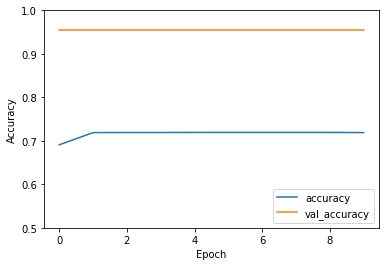

In [55]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)
print(test_loss, test_acc)